In [1]:
import wooldridge as woo
import datetime
import numpy as np 
import pandas as pd
import pandas_datareader as pdr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from supplementaryFunctions import *

In [2]:
# Autocorrelation when comparing rates

In [3]:
phillips = woo.dataWoo("phillips")
periods = len(phillips.index)

# define yearly time series index
pd.to_datetime(phillips["year"])
phillips.set_index("year", inplace = True)
yt96 = phillips.index <= 1996
formula = "Q('inf') ~ unem"
reg_s = smf.ols(formula = formula,
               data = phillips,
               subset = yt96)
results_s = reg_s.fit()
OLS_summary(results_s)

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0527$$,,,,
Intercept,1.4236,0.8282,0.4118,1.7190
unem,0.4676,1.6174,0.1125,0.2891


['Intercept', 'unem']
Q('inf')


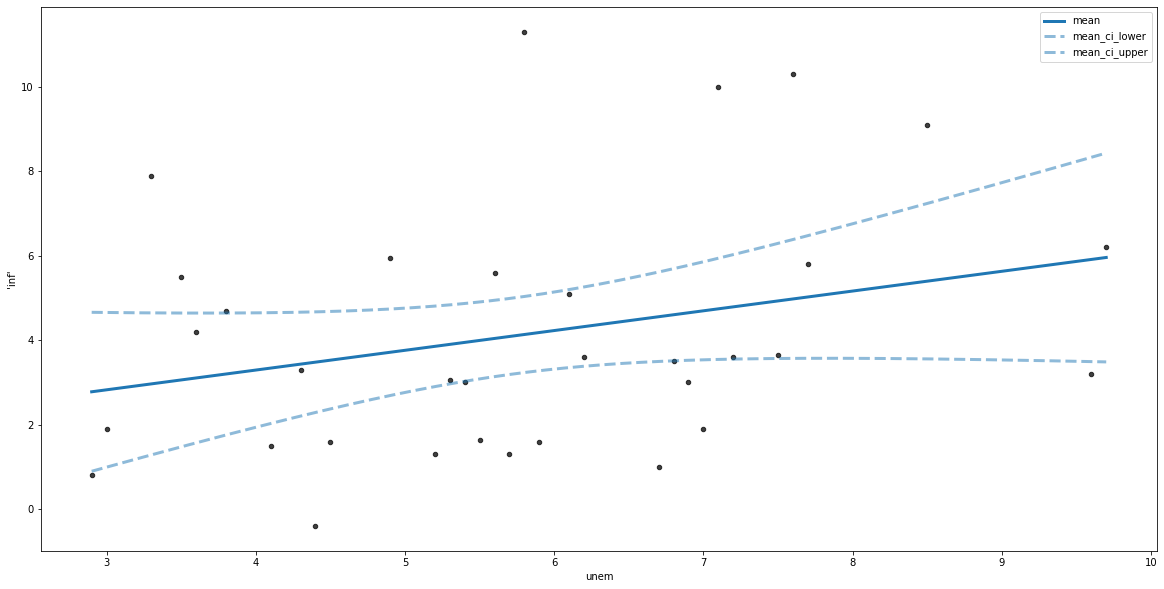

In [4]:
build_estimator(phillips, results_s, "Q('inf')")
build_smooth_multiple_regression_estimator(reg_s, phillips)

### Testing for Serial Correlation

#### Regress lag of error against error

$$\hat{u_t} = \hat{\rho}\hat{u_{t-1}}+ k$$

In [5]:
# residuals and AR(1) test:
phillips["resid_s"] = results_s.resid
phillips["resid_s_lag1"] = phillips["resid_s"].shift() 
reg_df = phillips[["resid_s", "resid_s_lag1"]]
formula = "resid_s ~ resid_s_lag1 + 0"
reg = smf.ols(formula = formula,
             data = reg_df,
             subset = yt96)
results = reg.fit()
# for bivariate regression, the squareroot of r-squared 
# is the correlation between the variables 

print(results.rsquared ** .5, reg_df.corr().iloc[0][1])
OLS_summary(results)

0.5876936180647698 0.5882587556173747


,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.3454$$,,,,
resid_s_lag1,0.5727,4.9797,0.0,0.115


#### According to the t-statistic for $\hat{\rho}$, the estimated error term is serially correlated. 

#### We can also check the Durbin-Watson Statistic:

$$DW = \frac{\sum_{t=2}^{n}{(\hat{u}_t - \hat{u}_{t-1})^2}}{\sum_{t=1}^{n}{\hat{u}_t^2}}$$

In [6]:
statsmodels.stats.diagnostic.acorr_breusch_godfrey(results, nlags = 1)

(5.356006336085807,
 0.020651013085524358,
 5.651911880721935,
 0.021747051510411165)

['resid_s_lag1']
resid_s


C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\Projects\Graduate Macro Notebooks\supplementaryFunctions.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\widehat{" + y_name + "}$$"] = results.fittedvalues
C:\Users\JLCat\GithubRepositories\Learn-Python-for-Stats-and-Econ\Projects\Graduate Macro Notebooks\supplementaryFunctions.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["$$\hat{u}$$"] = results.resid


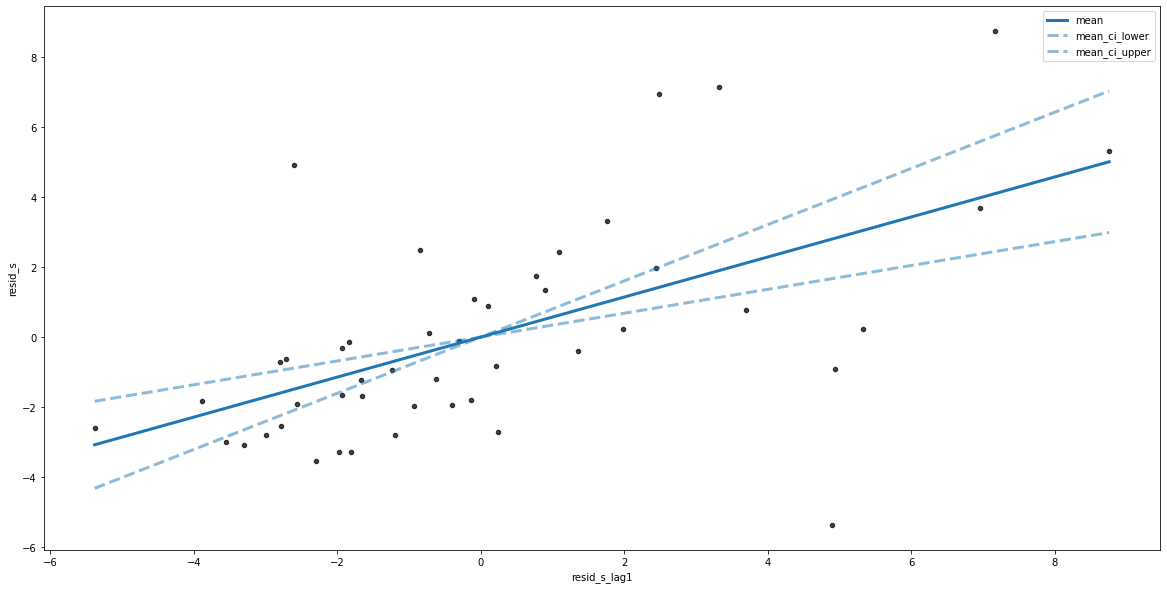

In [7]:
build_estimator(reg_df, results_s, "resid_s")
build_smooth_multiple_regression_estimator(reg, reg_df)